In [1]:
print("hello world")

hello world


In [2]:
import numpy as np

In [3]:
import matplotlib as mpl

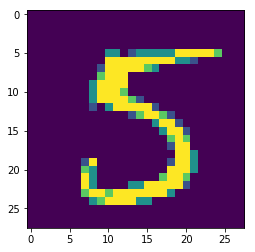

In [14]:
import matplotlib.pyplot as plt
img = plt.imread("./../images/mnist/5/3.bmp")
plt.imshow(img)

In [6]:
for i in range(28):
    print(img[i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  33  97 155 160
 254 255 254 148  14   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   4  66 147 235 253 253 245
 243 194  74  44  12   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   8 167 253 253 170  89  89  14
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   6 165 253 227  97   1   0   0   0
  81 120  83   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   6 167 253 253  85   0   0   0   0   5
 194 253 173   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  21 253 253 126   2   0   0   0   0  78
 253 253 162   0   0   0   0   0   0   0]
[  0   0   0   0   0

In [7]:
from pynq import Overlay

In [8]:
mnist_test_design = Overlay("./../bitstreams/mnist_test.bit")

In [9]:
mnist_test_design.ip_dict

{'axi_dma_0': {'addr_range': 65536,
  'device': <pynq.pl_server.device.XlnkDevice at 0xaf571030>,
  'driver': pynq.lib.dma.DMA,
  'fullpath': 'axi_dma_0',
  'gpio': {},
  'interrupts': {},
  'mem_id': 'S_AXI_LITE',
  'parameters': {'C_BASEADDR': '0x40400000',
   'C_DLYTMR_RESOLUTION': '125',
   'C_ENABLE_MULTI_CHANNEL': '0',
   'C_FAMILY': 'zynq',
   'C_HIGHADDR': '0x4040FFFF',
   'C_INCLUDE_MM2S': '1',
   'C_INCLUDE_MM2S_DRE': '0',
   'C_INCLUDE_MM2S_SF': '1',
   'C_INCLUDE_S2MM': '1',
   'C_INCLUDE_S2MM_DRE': '0',
   'C_INCLUDE_S2MM_SF': '1',
   'C_INCLUDE_SG': '0',
   'C_INCREASE_THROUGHPUT': '0',
   'C_MICRO_DMA': '0',
   'C_MM2S_BURST_SIZE': '16',
   'C_M_AXIS_MM2S_CNTRL_TDATA_WIDTH': '32',
   'C_M_AXIS_MM2S_TDATA_WIDTH': '32',
   'C_M_AXI_MM2S_ADDR_WIDTH': '32',
   'C_M_AXI_MM2S_DATA_WIDTH': '64',
   'C_M_AXI_S2MM_ADDR_WIDTH': '32',
   'C_M_AXI_S2MM_DATA_WIDTH': '32',
   'C_M_AXI_SG_ADDR_WIDTH': '32',
   'C_M_AXI_SG_DATA_WIDTH': '32',
   'C_NUM_MM2S_CHANNELS': '1',
   'C_NUM_S2MM

In [123]:
hex(mnist_test_design.ip_dict["axi_dma_0"]["phys_addr"])

'0x40400000'

In [10]:
from pynq.lib import AxiGPIO

buttons_instance = mnist_test_design.ip_dict['axi_gpio_0']
buttons = AxiGPIO(buttons_instance).channel1

In [11]:
buttons.read()

0

In [12]:
switches_instance = mnist_test_design.ip_dict['axi_gpio_2']
switches = AxiGPIO(switches_instance).channel1

In [13]:
switches.read()

2

In [23]:
led_instance = mnist_test_design.ip_dict['axi_gpio_1']
led = AxiGPIO(led_instance).channel1

In [24]:
led[0:4].write(0x1)

In [25]:
from time import sleep

while(1):
    led[0:4].write(0x1)
    sleep(1)
    led[0:4].write(0x3)
    sleep(1)
    led[0:4].write(0x7)
    sleep(1)
    led[0:4].write(0xf)
    sleep(1)
    led[0:4].off()
    sleep(1)

KeyboardInterrupt: 

In [ ]:
led[0:4].off()

In [10]:
dma_send_recv = mnist_test_design.axi_dma_0

In [15]:
import pynq.lib.dma
from pynq import allocate
import time

img_size = 28
input_buf = allocate(shape=(img_size*img_size,), dtype=np.uint32)
output_buf = allocate(shape=(1,), dtype=np.uint32)
for i in range(img_size):
    for j in range(img_size):
        input_buf[img_size*i+j] = img[i][j]

In [16]:
start = time.time()
dma_send_recv.sendchannel.transfer(input_buf)
dma_send_recv.recvchannel.transfer(output_buf)
dma_send_recv.sendchannel.wait()
dma_send_recv.recvchannel.wait()
end = time.time()
print('time cost: ' + str(round(end-start,5)) + ' s')

time cost: 0.00431 s


In [17]:
print(str(output_buf[0]))

5
